<a href="https://colab.research.google.com/github/PriyanshuGupta1/TnT/blob/master/Sessional.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [106]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import seaborn as sns

from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.preprocessing import MinMaxScaler

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score

In [107]:
df=pd.read_csv('/content/iris-write-from-docker.csv')
df

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [108]:
cols = ['class']

In [109]:
df.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
class            object
dtype: object

In [110]:
for col in cols:
    le = preprocessing.LabelEncoder()
    df[col] = le.fit_transform(df[col])
df.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [111]:
df['class'] = df['class'].astype(float)

In [112]:
min_max_scaler = preprocessing.MinMaxScaler()
cols_norm=['sepal_length','sepal_width','petal_length','petal_width']
df[cols_norm]=min_max_scaler.fit_transform(df[cols_norm])
df

,sepal_length,sepal_width,petal_length,petal_width,class
0,0.222222,0.625000,0.067797,0.041667,0.0
1,0.166667,0.416667,0.067797,0.041667,0.0
2,0.111111,0.500000,0.050847,0.041667,0.0
3,0.083333,0.458333,0.084746,0.041667,0.0
4,0.194444,0.666667,0.067797,0.041667,0.0
...,...,...,...,...,...
145,0.666667,0.416667,0.711864,0.916667,2.0
146,0.555556,0.208333,0.677966,0.750000,2.0
147,0.611111,0.416667,0.711864,0.791667,2.0
148,0.527778,0.583333,0.745763,0.916667,2.0


In [113]:
x_train, x_test, y_train, y_test = train_test_split(df.drop(columns = ['class']), df['class'], test_size = 0.3)

In [114]:
algos = []
accuracy = []
recall = []
precision = []
f1Score = []
specificity=[]

In [115]:
algo = "SVM"
model = svm.SVC()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print(algo)
cm1=confusion_matrix(y_test, y_pred)
print(confusion_matrix(y_test, y_pred), '\n\n')
acc = accuracy_score(y_test, y_pred,) * 100
print('Accuracy:', acc)
pre = precision_score(y_test, y_pred,average='micro') * 100
print('Precision:', pre)
rec = recall_score(y_test, y_pred,average='micro') * 100
print('Recall Naive Bayes is :', rec)
f1s = f1_score(y_test, y_pred,average='micro') * 100
print('F1 score:', f1s)
sp1=cm1[0][0]/(cm1[0][0]+cm1[0][1])
print('Specificity:', sp1)
specificity.append(sp1)

algos.append(algo)
accuracy.append(acc)

precision.append(pre)
f1Score.append(f1s)

SVM
[[13  0  0]
 [ 0 19  1]
 [ 0  1 11]] 


Accuracy: 95.55555555555556
Precision: 95.55555555555556
Recall Naive Bayes is : 95.55555555555556
F1 score: 95.55555555555556
Specificity: 1.0


In [121]:
algo = "Naive Bayes"
model = GaussianNB()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print(algo)
cm1=confusion_matrix(y_test, y_pred)
print(confusion_matrix(y_test, y_pred), '\n\n')
acc = accuracy_score(y_test, y_pred) * 100
print('Accuracy Naive Bayes is :', acc)
rec = recall_score(y_test, y_pred,average='micro') * 100
print('Recall Naive Bayes is :', rec)
pre = precision_score(y_test, y_pred,average='micro') * 100
print('Precision Naive Bayes is :', pre)
f1s = f1_score(y_test, y_pred,average='micro') * 100
print('F1 score Naive Bayes is :', f1s)
sp1=cm1[0][0]/(cm1[0][0]+cm1[0][1])
print('Specificity:', sp1)
specificity.append(sp1)

algos.append(algo)
accuracy.append(acc)
recall.append(rec)
precision.append(pre)
f1Score.append(f1s)

Naive Bayes
[[13  0  0]
 [ 0 19  1]
 [ 0  0 12]] 


Accuracy Naive Bayes is : 97.77777777777777
Recall Naive Bayes is : 97.77777777777777
Precision Naive Bayes is : 97.77777777777777
F1 score Naive Bayes is : 97.77777777777777
Specificity: 1.0


In [117]:
algo = "K Nearest Neighbour"
model = KNeighborsClassifier()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print(algo)
cm1=confusion_matrix(y_test, y_pred)
print(confusion_matrix(y_test, y_pred), '\n\n')
acc = accuracy_score(y_test, y_pred) * 100
print('Accuracy for K Nearest Neighbour is :', acc)
rec = recall_score(y_test, y_pred,average='micro') * 100
print('Recall K Nearest Neighbour is :', rec)
pre = precision_score(y_test, y_pred,average='micro') * 100
print('Precision is K Nearest Neighbour :', pre)
f1s = f1_score(y_test, y_pred,average='micro') * 100
print('F1 score is K Nearest Neighbour :', f1s)
sp1=cm1[0][0]/(cm1[0][0]+cm1[0][1])
print('Specificity:', sp1)
specificity.append(sp1)

algos.append(algo)
accuracy.append(acc)
recall.append(rec)
precision.append(pre)
f1Score.append(f1s)


K Nearest Neighbour
[[13  0  0]
 [ 0 19  1]
 [ 0  1 11]] 


Accuracy for K Nearest Neighbour is : 95.55555555555556
Recall K Nearest Neighbour is : 95.55555555555556
Precision is K Nearest Neighbour : 95.55555555555556
F1 score is K Nearest Neighbour : 95.55555555555556
Specificity: 1.0


In [118]:
algo = "Ada Boost"
model = AdaBoostClassifier()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print(algo)
cm1=confusion_matrix(y_test, y_pred)
print(confusion_matrix(y_test, y_pred), '\n\n')
acc = accuracy_score(y_test, y_pred) * 100
print('Accuracy:', acc)
rec = recall_score(y_test, y_pred,average='micro') * 100
print('Recall:', rec)
pre = precision_score(y_test, y_pred,average='micro') * 100
print('Precision:', pre)
f1s = f1_score(y_test, y_pred,average='micro') * 100
print('F1 score:', f1s)
sp1=cm1[0][0]/(cm1[0][0]+cm1[0][1])
print('Specificity:', sp1)
specificity.append(sp1)

algos.append(algo)
accuracy.append(acc)
recall.append(rec)
precision.append(pre)
f1Score.append(f1s)

Ada Boost
[[13  0  0]
 [ 0 17  3]
 [ 0  1 11]] 


Accuracy: 91.11111111111111
Recall: 91.11111111111111
Precision: 91.11111111111111
F1 score: 91.11111111111111
Specificity: 1.0


In [122]:
new = pd.DataFrame(list(zip(algos ,accuracy,recall ,precision ,f1Score)), columns = ('algo' ,'acc' ,'rec' ,'pre','f1s'))
new

,algo,acc,rec,pre,f1s
0,SVM,95.555556,97.777778,95.555556,95.555556
1,Naive Bayes,97.777778,95.555556,97.777778,97.777778
2,K Nearest Neighbour,95.555556,91.111111,95.555556,95.555556
3,Ada Boost,91.111111,97.777778,91.111111,91.111111


<BarContainer object of 4 artists>

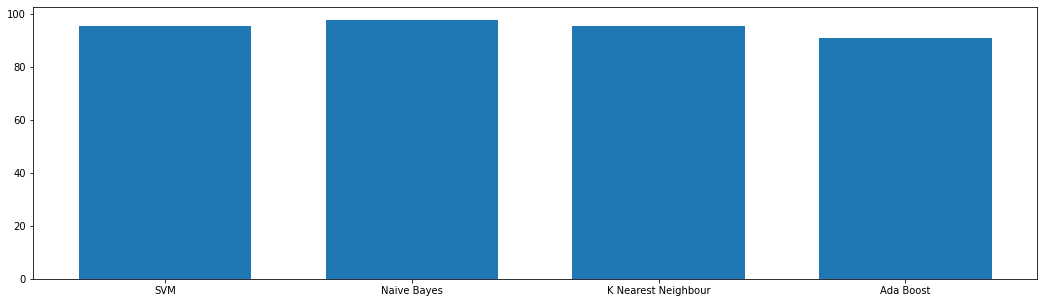

In [119]:
plt.figure(figsize=(18,5))
plt.bar(algos, accuracy,width = 0.7)

In [120]:
n = int(input("Enter the number"))
fact = 1
if n < 0:
    print("Factorial is not possible")
else:
    for i in range(1, n+1,1):
        fact*= i
    print(f"Factorial is {fact}")


Enter the number9
Factorial is 362880
